# Analise de Base de Vendas e Devoluções 

## Base com  diversos arquivos de vendas e devoluções, que queremos compilar para entender qual seria o faturmento bruto, qual produto mais vendido em unidade, qual produto mais vendeu em faturamento, faturamento por estado. Valores totais de devoluções, devoluções por estados e quais produtos tem mais devoluções para entendermos como atuar com relação a politica de devoluções e qualidades

In [1]:
# importar biblioteca glob para mapeamento de arquivos em diretrórios
import glob

#importar biblioteca pandas para tratar os dataframes
import pandas as pd

#importar numpy para tratamento de valores numéricos
import numpy as np

#importar biblioteca para fazer gráficos
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# faz o mapeamento dentro do jupyter notebook que eu já abri o arquivo python
# abre a pasta no computador com as bases que eu quero empilhar e coloquei
# na variável glob - com a extensão final do arquivo que quero ler
# após a \ colocar o prefixo do arquivo que pode ser lido e o * para os demais arquivos
df_vendas = glob.glob('Vendas\Vendas*.csv')

In [3]:
# dataframe de devoluções com as bases de dados
df_devolucoes = glob.glob('Vendas\Devolucoes*.csv')

In [4]:
# leitura da variável dados com lista dos arquivos que estão no diretório
# no caso estamos avaliando filiais em diversas capitais que precisamos colocar em um dataframe único de Vendas
df_vendas

['Vendas\\Vendas - Belo Horizonte.csv',
 'Vendas\\Vendas - Curitiba.csv',
 'Vendas\\Vendas - Fortaleza.csv',
 'Vendas\\Vendas - Goiás.csv',
 'Vendas\\Vendas - Porto Alegre.csv',
 'Vendas\\Vendas - Recife.csv',
 'Vendas\\Vendas - Rio de Janeiro.csv',
 'Vendas\\Vendas - Salvador.csv',
 'Vendas\\Vendas - São Paulo.csv']

In [5]:
df_devolucoes

['Vendas\\Devolucoes - Belo Horizonte.csv',
 'Vendas\\Devolucoes - Curitiba.csv',
 'Vendas\\Devolucoes - Fortaleza.csv',
 'Vendas\\Devolucoes - Goiás.csv',
 'Vendas\\Devolucoes - Porto Alegre.csv',
 'Vendas\\Devolucoes - Recife.csv',
 'Vendas\\Devolucoes - Rio de Janeiro.csv',
 'Vendas\\Devolucoes - Salvador.csv',
 'Vendas\\Devolucoes - São Paulo.csv']

In [6]:
# fazer iteração na lista para fazer leitra e concatenar as planilhas de vendas
df_vendas_empilhada = pd.DataFrame()

# loop para leitura de dados das tabelas
for i in df_vendas:
    vendas = pd.read_csv(i)
    #criar a tabela onde vai ficar armazenada as bases empilhadas
    # axis = 0 -> para colocar o eixo que quero fazer a união
    # ignore index = true -> para não ter index repetidos
    df_vendas_empilhada = pd.concat([df_vendas_empilhada,vendas], axis = 0, ignore_index = True)

In [7]:
# então temos um dataframe de vendas com 9999 linhas e as vendas das lojas estão todas contidas nesse dataframe
display(df_vendas_empilhada)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
9994,9981,HL7348,SmartWatch,4,João,Junior,4/14/2018,São Paulo,1400,NaN
9995,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2018,São Paulo,5300,NaN
9996,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2018,São Paulo,5300,NaN
9997,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2018,São Paulo,1400,NaN


In [8]:
# excluir colunas desncessárias -Unnamed 
df_vendas_empilhada.drop('Unnamed: 0', axis =1,inplace = True)
df_vendas_empilhada.drop('Unnamed: 8', axis =1,inplace = True)

In [9]:
df_vendas_empilhada.head()

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500
1,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500
2,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300
3,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300
4,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500


In [10]:
# coloquei Iphone com letra maiscula para poder rodar o merge

df_vendas_empilhada['Produto'] = df_vendas_empilhada['Produto'].str.capitalize()
df_vendas_empilhada.head()

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500
1,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500
2,HL1918,Iphone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300
3,HL1918,Iphone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300
4,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500


In [11]:
# fazer iteração na lista para fazer leitra e concatenar as planilhas de devoluções
df_devolucoes_empilhada = pd.DataFrame()

# loop para leitura de dados das tabelas
for i in df_devolucoes:
    devolucoes = pd.read_csv(i)
    #criar a tabela onde vai ficar armazenada as bases empilhadas
    # axis = 0 -> para colocar o eixo que quero fazer a união
    # ignore index = true -> para não ter index repetidos
    df_devolucoes_empilhada = pd.concat([df_devolucoes_empilhada,devolucoes], axis = 0, ignore_index = True)

In [12]:
# então temos um dataframe de vendas com 499 linhas e as devolucoes das lojas estão todas contidas nesse dataframe
display(df_devolucoes_empilhada)

,Unnamed: 0,SKU,Produto,Quantidade Devolvida,Data,Loja,Preço Unitário,Unnamed: 6
0,3,HL1148,Iphone,3,10/31/2018,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2018,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2018,Belo Horizonte,1400,NaN
3,21,HL1918,Android,1,5/26/2018,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2018,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
494,477,HL9654,Televisão,5,4/5/2018,São Paulo,2500,NaN
495,478,HL6259,Notebook,1,10/27/2018,São Paulo,3500,NaN
496,486,HL7348,SmartWatch,5,4/13/2018,São Paulo,1400,NaN
497,487,HL2714,Tablet,2,9/7/2018,São Paulo,1600,NaN


In [13]:
# excluir colunas desncessárias -Unnamed 
df_devolucoes_empilhada.drop('Unnamed: 0', axis =1,inplace = True)
df_devolucoes_empilhada.drop('Unnamed: 6', axis =1,inplace = True)

In [14]:
df_devolucoes_empilhada.head()

,SKU,Produto,Quantidade Devolvida,Data,Loja,Preço Unitário
0,HL1148,Iphone,3,10/31/2018,Belo Horizonte,5300
1,HL7348,SmartWatch,1,2/6/2018,Belo Horizonte,1400
2,HL7348,SmartWatch,3,10/5/2018,Belo Horizonte,1400
3,HL1918,Android,1,5/26/2018,Belo Horizonte,3400
4,HL2714,Tablet,1,4/24/2018,Belo Horizonte,1600


In [15]:
# Calculo do produto mais Vendido em quantidade
df_produtos_vendas = df_vendas_empilhada.groupby('Produto').sum()
df_produtos_vendas = df_produtos_vendas[['Quantidade Vendida']].sort_values(by='Quantidade Vendida',ascending = False)
display(df_produtos_vendas)

# Calculo do produto mais devolvido em quantidade
df_produtos_devolucao = df_devolucoes_empilhada.groupby('Produto').sum()
df_produtos_devolucao = df_produtos_devolucao[['Quantidade Devolvida']].sort_values(by='Quantidade Devolvida',ascending = False)
display(df_produtos_devolucao)

,Quantidade Vendida
Produto,
Iphone,8974
Televisão,5931
Notebook,3249
Android,3183
Smartwatch,2980
Tablet,2921
Câmera,2805


,Quantidade Devolvida
Produto,
SmartWatch,395
Tablet,301
Android,187
Notebook,174
Iphone,170
Televisão,147
Câmera,143


In [16]:
# Outra forma de fazer soma de valores de produtos para colocar no gráfico
soma_quantidade = df_produtos_vendas['Quantidade Vendida']
y_quantidade = sum(soma_quantidade)
display(soma_quantidade)

Produto
Iphone        8974
Televisão     5931
Notebook      3249
Android       3183
Smartwatch    2980
Tablet        2921
Câmera        2805
Name: Quantidade Vendida, dtype: int64

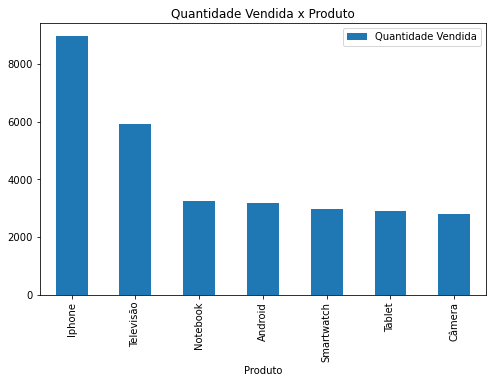

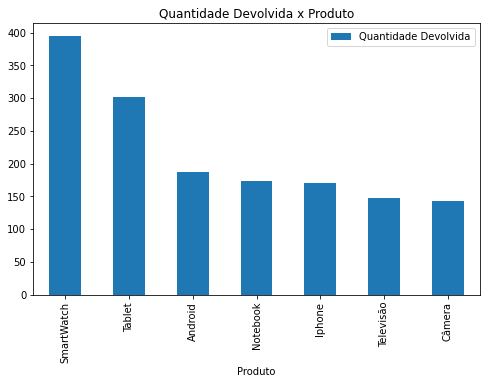

In [17]:
# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_produtos_vendas.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Quantidade Vendida x Produto')
# tira o outrput que fica em cima do gráfico
plt.show()



# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_produtos_devolucao.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Quantidade Devolvida x Produto')
# tira o outrput que fica em cima do gráfico
plt.show()

### Quais são os produtos mais vendidos e mais devolvidos em quantidades?
#### Conforme os gráficos acima demonstram que o produto com maiores vendas está o Iphone, televisão e notebook.
#### Falando sobre devoluções temos um grande volume de devoluções de Smartwatch e tablet, que estão com o volume de vendas inferiores aos demais, sendo um ponto de atenção para entendermos mais profundamente possíveis questões de qualidades desses pordutos.

In [18]:
# Calcular o produto que mais faturou (em faturamento) e colocar uma coluna de faturamento no dataframe
df_vendas_empilhada['Faturamento'] = df_vendas_empilhada['Quantidade Vendida'] * df_vendas_empilhada['Preco Unitario']
df_vendas_empilhada

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Faturamento
0,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500,5000
1,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500,2500
2,HL1918,Iphone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300,26500
3,HL1918,Iphone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300,26500
4,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500,17500
...,...,...,...,...,...,...,...,...,...
9994,HL7348,Smartwatch,4,João,Junior,4/14/2018,São Paulo,1400,5600
9995,HL1918,Iphone,4,Itai,Puntel,5/2/2018,São Paulo,5300,21200
9996,HL1918,Iphone,1,Guilherme,Vianna,3/18/2018,São Paulo,5300,5300
9997,HL7348,Smartwatch,5,Antônio,Soares,11/21/2018,São Paulo,1400,7000


In [19]:
# Calcular o produto que mais devolvido (em faturamento) e colocar uma coluna de devoluções devolução no dataframe
df_devolucoes_empilhada['Devolucoes'] = df_devolucoes_empilhada['Quantidade Devolvida'] * df_devolucoes_empilhada['Preço Unitário']
df_devolucoes_empilhada

,SKU,Produto,Quantidade Devolvida,Data,Loja,Preço Unitário,Devolucoes
0,HL1148,Iphone,3,10/31/2018,Belo Horizonte,5300,15900
1,HL7348,SmartWatch,1,2/6/2018,Belo Horizonte,1400,1400
2,HL7348,SmartWatch,3,10/5/2018,Belo Horizonte,1400,4200
3,HL1918,Android,1,5/26/2018,Belo Horizonte,3400,3400
4,HL2714,Tablet,1,4/24/2018,Belo Horizonte,1600,1600
...,...,...,...,...,...,...,...
494,HL9654,Televisão,5,4/5/2018,São Paulo,2500,12500
495,HL6259,Notebook,1,10/27/2018,São Paulo,3500,3500
496,HL7348,SmartWatch,5,4/13/2018,São Paulo,1400,7000
497,HL2714,Tablet,2,9/7/2018,São Paulo,1600,3200


In [20]:
# Calculo do produto mais Vendido em quantidade
df_faturamento_vendas = df_vendas_empilhada.groupby('Produto').sum()
df_faturamento_vendas = df_faturamento_vendas[['Faturamento']].sort_values(by='Faturamento',ascending = False)
display(df_faturamento_vendas)

# Calculo do produto mais devolvido em quantidade
df_faturamento_devolucao = df_devolucoes_empilhada.groupby('Produto').sum()
df_faturamento_devolucao = df_faturamento_devolucao[['Devolucoes']].sort_values(by='Devolucoes',ascending = False)
display(df_faturamento_devolucao)

,Faturamento
Produto,
Iphone,47562200
Televisão,14827500
Notebook,11371500
Android,10822200
Câmera,5890500
Tablet,4673600
Smartwatch,4172000


,Devolucoes
Produto,
Iphone,901000
Android,635800
Notebook,609000
SmartWatch,553000
Tablet,481600
Televisão,367500
Câmera,300300


In [21]:
# junção entre colunas de Fatumento e Devoluções por loja para entender o fatumento liquido de cada loja
# usei o calculo das tabelas código acima

df_fat_produto = pd.merge(df_faturamento_vendas,df_faturamento_devolucao, on = 'Produto')
df_fat_produto['Fat. Prod. Liq'] = df_fat_produto['Faturamento']-df_fat_produto['Devolucoes']
display(df_fat_produto)

# o Produto iPhone está escrtio de forma diferente nas duas tabelas
# portanto preciso tratar nas devoluções a forma que está escrito iPhone para trazer no merge

,Faturamento,Devolucoes,Fat. Prod. Liq
Produto,,,
Iphone,47562200,901000,46661200
Televisão,14827500,367500,14460000
Notebook,11371500,609000,10762500
Android,10822200,635800,10186400
Câmera,5890500,300300,5590200
Tablet,4673600,481600,4192000


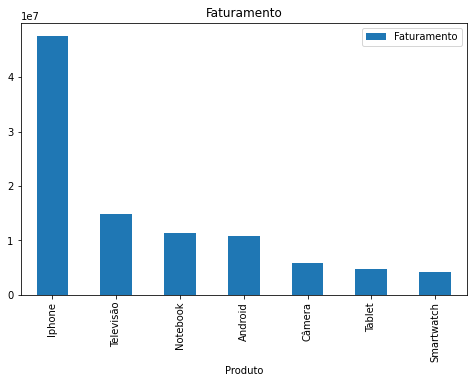

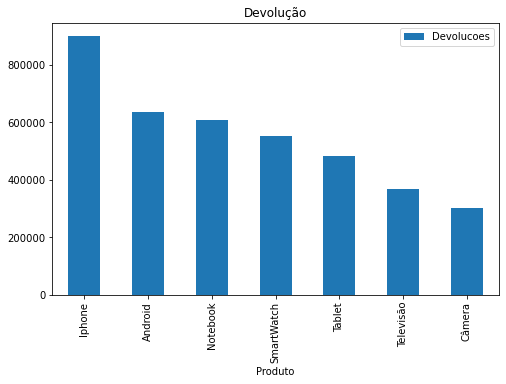

In [22]:
# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_faturamento_vendas.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Faturamento')
# tira o outrput que fica em cima do gráfico
plt.show()



# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_faturamento_devolucao.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Devolução')
# tira o outrput que fica em cima do gráfico
plt.show()

### Quais são os produtos mais vendidos e mais devolvidos em Faturamento?

#### Conforme os gráficos acima demonstram que o produto com maiores vendas está o Iphone, televisão e notebook, que também constam como maiores em quantidade de vendas, poderíamos tentar diminuir o gap entre o primeiro produto aos demais para termos um mix de produto mais saudável, caso ocorra algum eventual problema com a distribuição de Iphone e não ficarmos presos a apenas um produto.

#### Falando sobre devoluções temos um grande volume de devoluções de Smartwatch e tablet comparando com o nível de faturamento de vendas, sendo necessário verificar eventuais questões de qualidades nos produtos do nosso fornecedor.

In [35]:
# calcular loja que mais vendeu em faturamento
df_lojas = df_vendas_empilhada.groupby('Loja').sum()
df_lojas = df_lojas[['Faturamento']].sort_values(by='Faturamento',ascending = False)



# calcular loja que mais teve valor de devolução
df_dev_lojas = df_devolucoes_empilhada.groupby('Loja').sum()
df_dev_lojas = df_dev_lojas[['Devolucoes']].sort_values(by='Devolucoes',ascending = False)



df_fat_lojas = pd.merge(df_lojas,df_dev_lojas, on = 'Loja')
df_fat_lojas['Faturamento Loja Liquido'] = df_lojas['Faturamento'] - df_dev_lojas['Devolucoes']
df_fat_lojas['% Devolução Loja'] = round((df_dev_lojas['Devolucoes'] / df_lojas['Faturamento'])*100,2)
display(df_fat_lojas)


,Faturamento,Devolucoes,Faturamento Loja Liquido,% Devolução Loja
Loja,,,,
São Paulo,22098300,809800,21288500,3.66
Rio de Janeiro,14867800,608000,14259800,4.09
Fortaleza,14087900,652200,13435700,4.63
Salvador,13111300,478400,12632900,3.65
Goiás,7441800,278200,7163600,3.74
Recife,7303000,227500,7075500,3.12
Curitiba,7060500,298700,6761800,4.23
Porto Alegre,6868600,274300,6594300,3.99
Belo Horizonte,6480300,221100,6259200,3.41


### Quais são as Lojas que mais Faturam?

#### Conforme a tabela acima demonstram que a loja com maior faturamento é a de São Paulo, seguida por Rio de Janeiro e Fortaleza.

#### Os valores de devoluções acompanham os valores de faturamento, não havendo uma loja que se destaque negativamente.

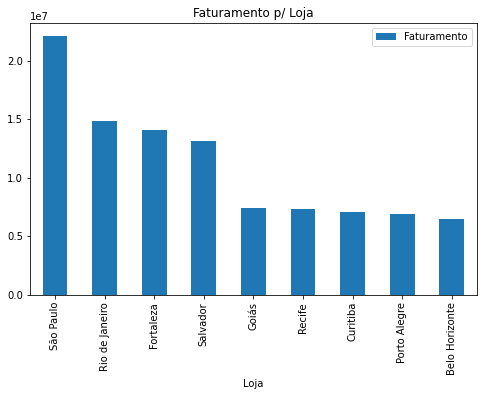

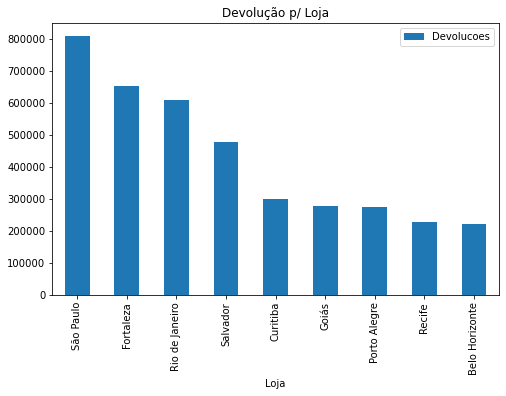

In [26]:
# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_lojas.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Faturamento p/ Loja')
# tira o outrput que fica em cima do gráfico
plt.show()



# pegar o dataframe com a soma de valores que quero colocar no gráfico e usar função plot para visualizar grafico
df_dev_lojas.plot(kind='bar', figsize=(8,5))
# nome do gráfico
plt.title('Devolução p/ Loja')
# tira o outrput que fica em cima do gráfico
plt.show()
